In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import zipfile
import os

# Path to your dataset zip
zip_path = "/content/dataset.zip"
extract_path = "/content/dataset"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)

Extracted to: /content/dataset


In [2]:
import os

train_data_dir = r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\dataset\train"
validation_data_dir=r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\dataset\val"


In [3]:
from pathlib import Path
import imghdr

data_dir = validation_data_dir

image_extensions = [".png", ".jpg", ".jpeg", ".bmp", ".gif"]  # allowed extensions
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]       # formats TensorFlow accepts

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"❌ {filepath} is not a valid image → deleting")
            filepath.unlink()  # delete file
        elif img_type not in img_type_accepted_by_tf:
            print(f"❌ {filepath} is {img_type}, not accepted by TensorFlow → deleting")
            filepath.unlink()  # delete file

C:\Users\HP\AppData\Local\Temp\ipykernel_5524\3129462633.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
from pathlib import Path
import imghdr

data_dir1 = train_data_dir

image_extensions = [".png", ".jpg", ".jpeg", ".bmp", ".gif"]  # allowed extensions
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]       # formats TensorFlow accepts

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"❌ {filepath} is not a valid image → deleting")
            filepath.unlink()  # delete file
        elif img_type not in img_type_accepted_by_tf:
            print(f"❌ {filepath} is {img_type}, not accepted by TensorFlow → deleting")
            filepath.unlink()  # delete file

In [5]:
import tensorflow as tf

train_dataset =tf.keras.utils.image_dataset_from_directory(
    train_data_dir,
    image_size=(224,224),
    batch_size=32,
    color_mode="rgb",
    label_mode="int",
    shuffle=True,
    interpolation="bilinear",
    crop_to_aspect_ratio=True,
    follow_links=True,
)

val_dataset= tf.keras.utils.image_dataset_from_directory(
    validation_data_dir,
    image_size=(224,224),
    batch_size=32,
    color_mode="rgb",
    label_mode="int",
    shuffle=True,
    interpolation="bilinear",
    crop_to_aspect_ratio=True,
    follow_links=True,
)


Found 4372 files belonging to 6 classes.
Found 929 files belonging to 6 classes.


In [6]:
class_names = train_dataset.class_names
print("Class Names:", class_names)

Class Names: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


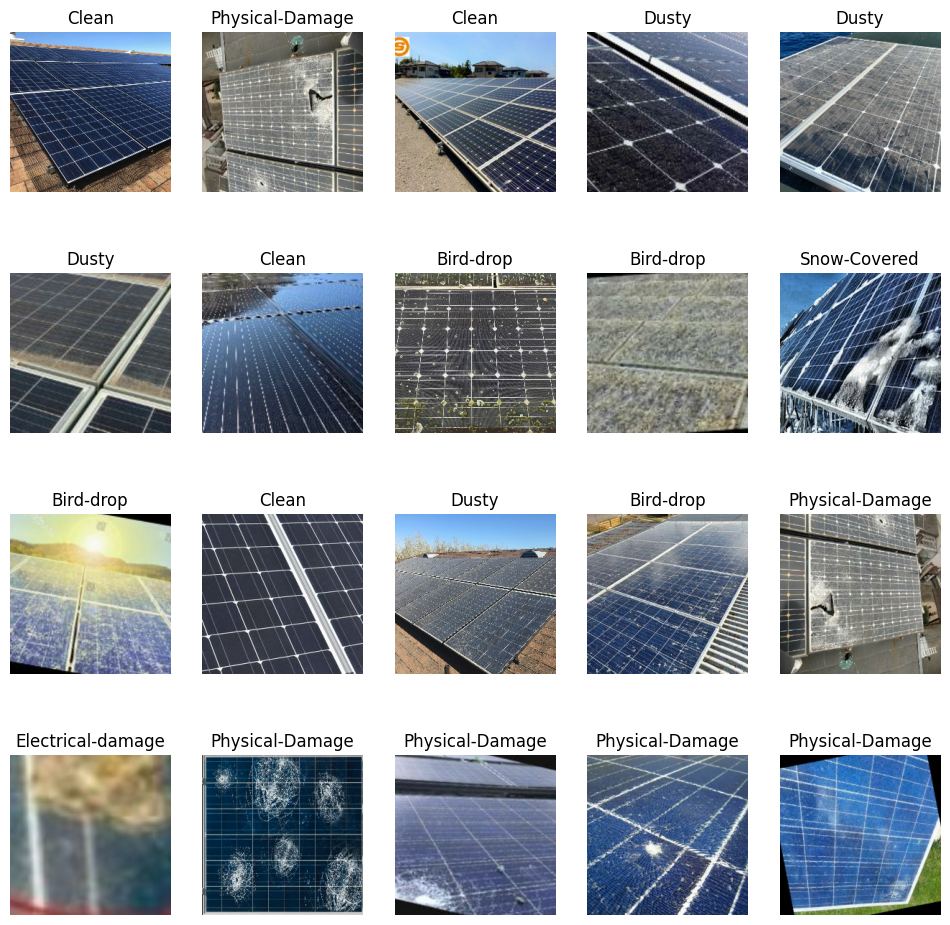

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

for images, labels in train_dataset.take(1):   # 1 batch (e.g., 32 images)
    for i in range(20):   # show 20 images
        ax = plt.subplot(4, 5, i + 1)    # 4 rows x 5 cols = 20 slots
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [9]:
import math

batch_size = 32
num_samples = train_dataset.cardinality().numpy() * batch_size
num_batches = math.ceil(num_samples / batch_size)

print("Total images:", num_samples)
print("Batch size:", batch_size)
print("Number of batches:", num_batches)

Total images: 4384
Batch size: 32
Number of batches: 137


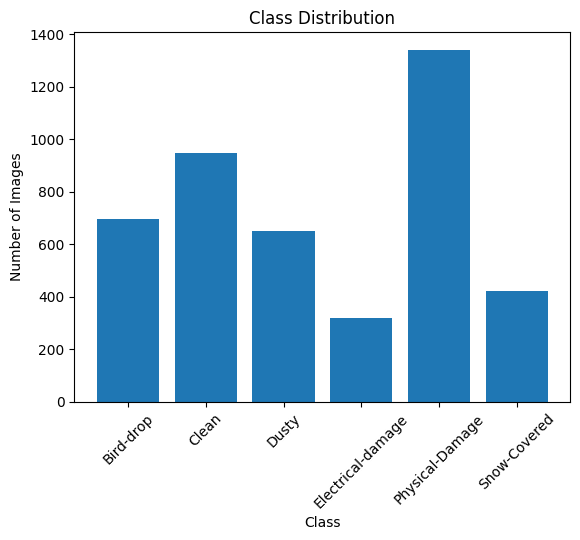

Class counts: {'Bird-drop': 698, 'Clean': 948, 'Dusty': 651, 'Electrical-damage': 318, 'Physical-Damage': 1341, 'Snow-Covered': 424}


In [10]:
import os
import matplotlib.pyplot as plt

class_counts = {cls: len(os.listdir(os.path.join(train_data_dir, cls))) for cls in os.listdir(train_data_dir)}

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

print("Class counts:", class_counts)

In [13]:
import cv2
import numpy as np

data_dir1 =r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\dataset\train\Bird-drop"
shapes = []

for file in os.listdir(data_dir1)[:100]:  # check first 100 images
    img = cv2.imread(os.path.join(data_dir1, file))
    shapes.append(img.shape)

shapes = np.array(shapes)
print("Average shape:", shapes.mean(axis=0))

Average shape: [694.12 796.68   3.  ]


tf.Tensor(
[[[  1.           3.           0.        ]
  [  0.6897321    2.689732     0.        ]
  [  0.14955354   2.1495535    0.        ]
  ...
  [140.65396    128.65396    128.65396   ]
  [135.79239    123.79238    123.79238   ]
  [133.         121.         121.        ]]

 [[  2.2410717    3.6205359    0.        ]
  [  2.2196023    3.5990665    0.        ]
  [  2.182224     3.561688     0.        ]
  ...
  [143.66658    131.66658    131.66658   ]
  [135.11781    123.117805   123.117805  ]
  [130.2076     118.20759    118.20759   ]]

 [[  4.401786     4.700893     0.        ]
  [  4.8831167    5.182224     0.        ]
  [  5.721117     6.0202236    0.        ]
  ...
  [148.91156    136.91156    136.91156   ]
  [133.94336    121.94336    121.94336   ]
  [125.34598    113.34598    113.34598   ]]

 ...

 [[117.30794    113.30794    112.30794   ]
  [123.35953    118.118454   116.80819   ]
  [133.89539    126.493614   124.643166  ]
  ...
  [ 51.056194    53.629883    62.15884   ]
  [ 67.

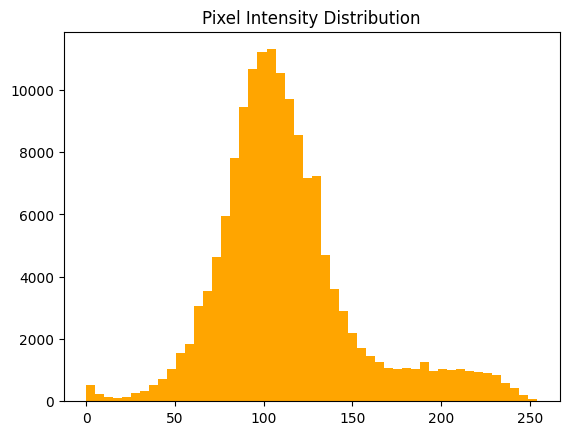

In [14]:
for images, _ in train_dataset.take(1):
    print(images[0],_[0])
    img = images[0].numpy().astype("uint8")
    plt.hist(img.ravel(), bins=50, color='orange')
    plt.title("Pixel Intensity Distribution")
    plt.show()
    break

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_dataset.map(lambda x, y: (normalization_layer(x), y))
# Optimize pipeline
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)

In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # output layer
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 220, 220, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 373248)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    47,775,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,906,822 (182.75 MB)

 Trainable params: 47,906,822 (182.75 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # works with integer labels
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 103s 469ms/step - accuracy: 0.3446 - loss: 2.1547 - val_accuracy: 0.3940 - val_loss: 1.5380
Epoch 2/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 71s 216ms/step - accuracy: 0.4471 - loss: 1.4042 - val_accuracy: 0.4015 - val_loss: 1.5322
Epoch 3/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 31s 228ms/step - accuracy: 0.4969 - loss: 1.2905 - val_accuracy: 0.5716 - val_loss: 1.1292
Epoch 4/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 30s 218ms/step - accuracy: 0.6239 - loss: 1.0230 - val_accuracy: 0.8224 - val_loss: 0.6179
Epoch 5/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 30s 219ms/step - accuracy: 0.7172 - loss: 0.7941 - val_accuracy: 0.8848 - val_loss: 0.4149
Epoch 6/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 30s 219ms/step - accuracy: 0.7829 - loss: 0.5870 - val_accuracy: 0.9160 - val_loss: 0.2786
Epoch 7/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 41s 219ms/step - accuracy: 0.8213 - loss: 0.4768 - val_accuracy: 0.9419 - val_loss: 0.2124
Epoch 8/30
137/137 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.8769 - loss: 

In [18]:
model.evaluate(val_ds)

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9672 - loss: 0.2375


[0.24179911613464355, 0.9655543565750122]

Found 95 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step


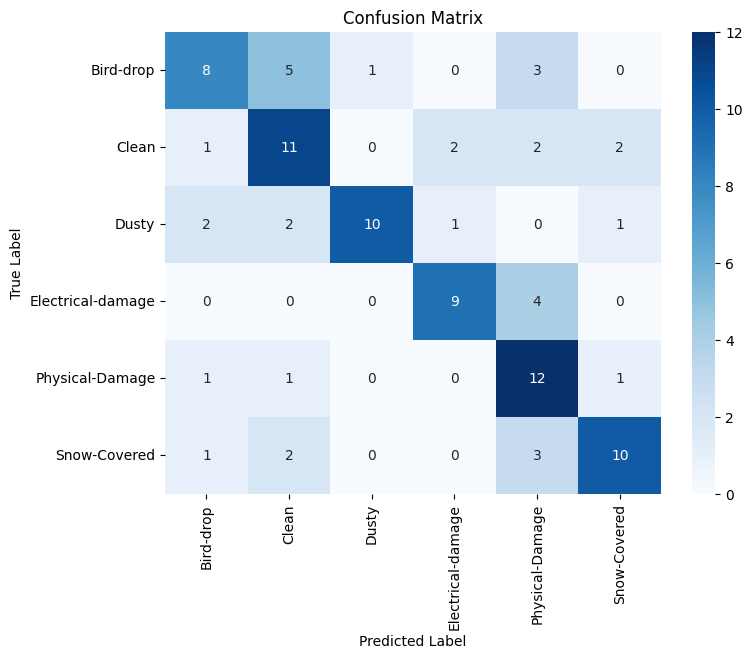

                   precision    recall  f1-score   support

        Bird-drop       0.62      0.47      0.53        17
            Clean       0.52      0.61      0.56        18
            Dusty       0.91      0.62      0.74        16
Electrical-damage       0.75      0.69      0.72        13
  Physical-Damage       0.50      0.80      0.62        15
     Snow-Covered       0.71      0.62      0.67        16

         accuracy                           0.63        95
        macro avg       0.67      0.64      0.64        95
     weighted avg       0.66      0.63      0.64        95



In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


# Load validation or test dataset (make sure labels are available)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/dataset/test",  # update with your folder
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # important! keep order
)

class_names = val_ds.class_names


val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

# Get class names
print("Classes:", class_names)

# Make predictions
y_true = np.concatenate([y for x, y in val_ds], axis=0)
y_pred_probs = model.predict(val_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print(classification_report(y_true, y_pred, target_names=class_names))

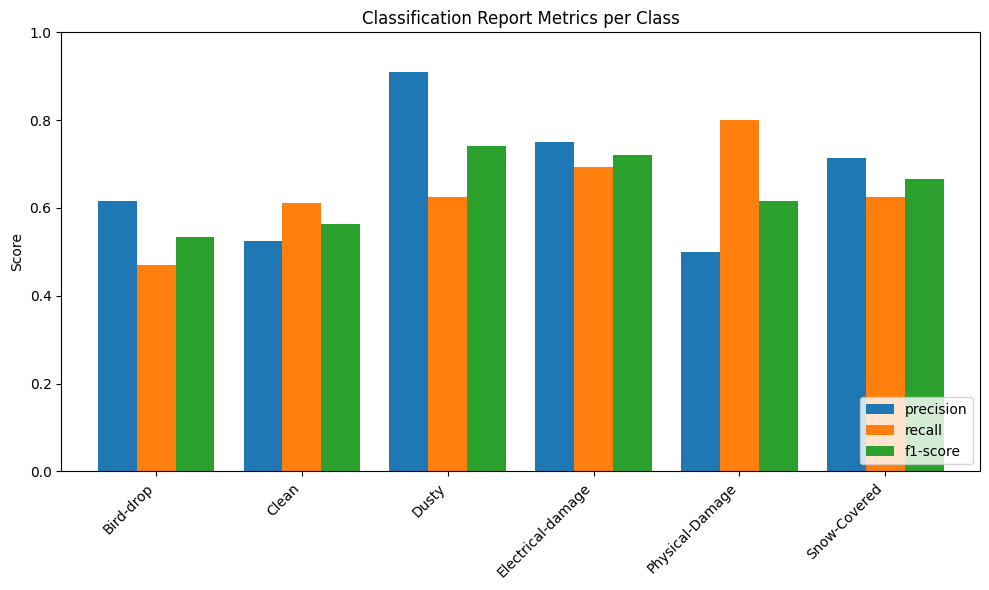

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report as dictionary
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert to DataFrame
df = pd.DataFrame(report).transpose()

# Drop summary rows if you only want per-class metrics
df_classes = df.iloc[:-3, :]

# Plot
df_classes[["precision", "recall", "f1-score"]].plot(
    kind="bar", figsize=(10,6), width=0.8
)

plt.title("Classification Report Metrics per Class")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

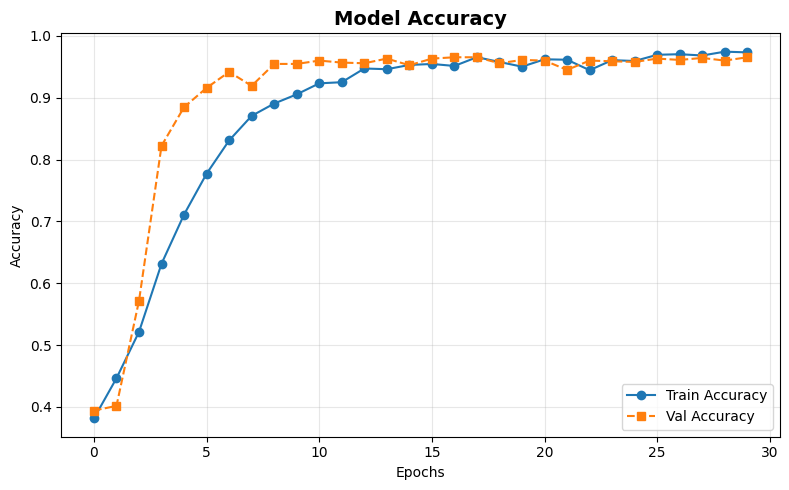

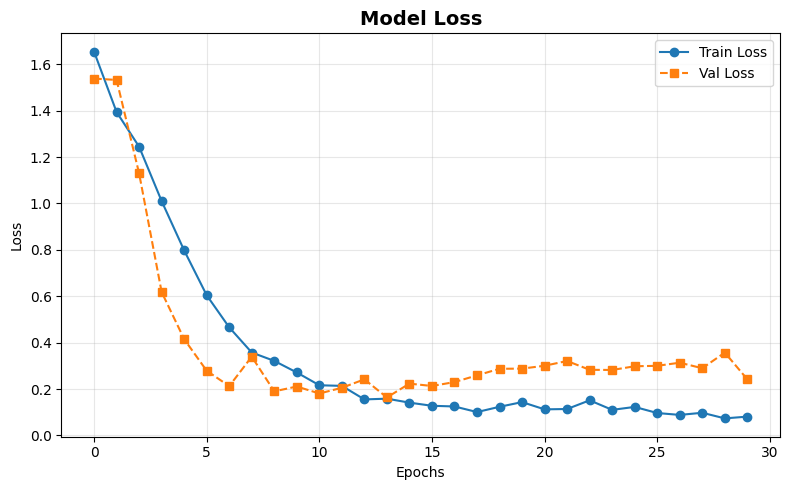

In [22]:
import matplotlib.pyplot as plt

# --- Accuracy Plot ---
plt.figure(figsize=(8,5))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o', linestyle='-')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='s', linestyle='--')
plt.title("Model Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss', marker='o', linestyle='-')
plt.plot(history.history['val_loss'], label='Val Loss', marker='s', linestyle='--')
plt.title("Model Loss", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

img_path=r"C:\Users\HP\Desktop\mini project1\solar panel\Dataset\Solar (88).jpg"

img = image.load_img(img_path, target_size=(224, 224,3))

img = image.load_img(img_path, target_size=(224, 224))

# Convert to array
img_array = image.img_to_array(img)

# Add batch dimension (1, 224, 224, 3)
img_array = np.expand_dims(img_array, axis=0)

# Normalize
img_array = img_array / 255.0

# Predict
pred = model.predict(img_array)  # shape = (1, num_classes)
predicted_class = np.argmax(pred, axis=1)  # gives class index

class_names = ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']

print("Predicted:", class_names[predicted_class[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Predicted: Physical-Damage


In [23]:
# Vgg16

In [24]:
from keras.layers import Input, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Model, Sequential

# Data augmentation pipeline
data_augmentation = Sequential([
    layers.RandomFlip("horizontal"),   # randomly flip images
    layers.RandomRotation(0.1),        # rotate ±10%
    layers.RandomZoom(0.1),            # zoom in/out
    layers.RandomContrast(0.1)         # adjust contrast
])

# Input layer (RGB here, change to (224,224,1) if grayscale)
_input = Input((224,224,3))

# Apply augmentation
x = data_augmentation(_input)

# VGG16-style architecture
conv1  = Conv2D(64, (3,3), padding="same", activation="relu")(x)
conv1  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(_input)
conv2  = Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu")(conv1)
pool1  = MaxPooling2D((2, 2))(conv2)

conv3  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(pool1)
conv4  = Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu")(conv3)
pool2  = MaxPooling2D((2, 2))(conv4)

conv5  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(pool2)
conv6  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv5)
conv7  = Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu")(conv6)
pool3  = MaxPooling2D((2, 2))(conv7)

conv8  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool3)
conv9  = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv8)
conv10 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv9)
pool4  = MaxPooling2D((2, 2))(conv10)

conv11 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(pool4)
conv12 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv11)
conv13 = Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu")(conv12)
pool5  = MaxPooling2D((2, 2))(conv13)

flat   = Flatten()(pool5)
dense1 = Dense(4096, activation="relu")(flat)
dense2 = Dense(4096, activation="relu")(dense1)
output = Dense(num_classes, activation="softmax")(dense2)

vgg16_model  = Model(inputs=_input, outputs=output)

In [25]:
from tensorflow.keras.optimizers import Adam


vgg16_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss="sparse_categorical_crossentropy",   # use "sparse_categorical_crossentropy" if labels are integers
    metrics=["accuracy"]
)

In [26]:
history1 = vgg16_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 184s 1s/step - accuracy: 0.2611 - loss: 1.7185 - val_accuracy: 0.3789 - val_loss: 1.6494
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 68s 494ms/step - accuracy: 0.4172 - loss: 1.4576 - val_accuracy: 0.3368 - val_loss: 1.6665
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 506ms/step - accuracy: 0.4626 - loss: 1.3567 - val_accuracy: 0.4632 - val_loss: 1.3589
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 67s 492ms/step - accuracy: 0.5547 - loss: 1.1615 - val_accuracy: 0.5474 - val_loss: 1.1783
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 68s 495ms/step - accuracy: 0.6051 - loss: 1.0260 - val_accuracy: 0.5895 - val_loss: 1.0513
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 82s 495ms/step - accuracy: 0.6787 - loss: 0.8332 - val_accuracy: 0.7053 - val_loss: 0.8824
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 67s 492ms/step - accuracy: 0.7748 - loss: 0.6232 - val_accuracy: 0.7368 - val_loss: 0.7234
Epoch 8/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 499ms/step - accuracy: 0.8209 - loss: 0.4

Found 95 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step


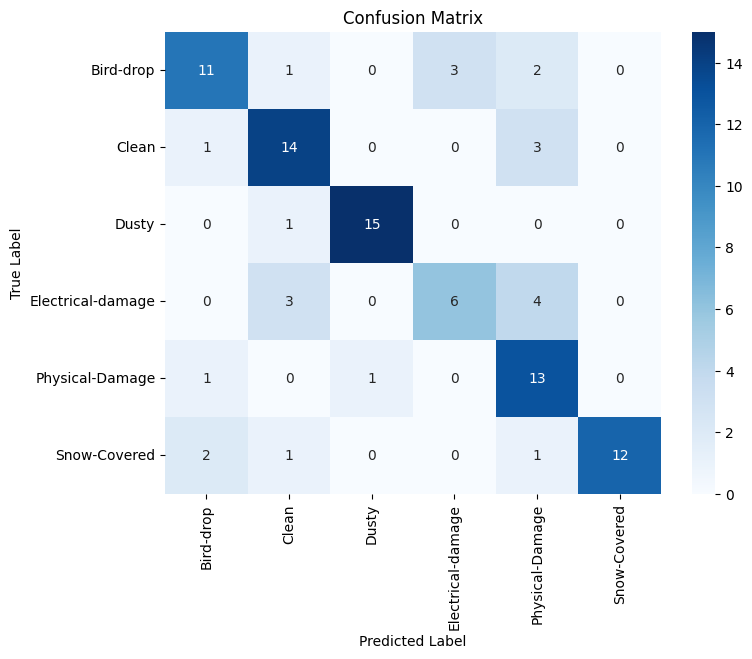

                   precision    recall  f1-score   support

        Bird-drop       0.73      0.65      0.69        17
            Clean       0.70      0.78      0.74        18
            Dusty       0.94      0.94      0.94        16
Electrical-damage       0.67      0.46      0.55        13
  Physical-Damage       0.57      0.87      0.68        15
     Snow-Covered       1.00      0.75      0.86        16

         accuracy                           0.75        95
        macro avg       0.77      0.74      0.74        95
     weighted avg       0.77      0.75      0.75        95



In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


# Load validation or test dataset (make sure labels are available)
val1 = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/dataset/test",  # update with your folder
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # important! keep order
)

class_names = val1.class_names


val1 = val1.map(lambda x, y: (normalization_layer(x), y))

# Get class names
print("Classes:", class_names)

# Make predictions
y_true1 = np.concatenate([y for x, y in val1], axis=0)
y_pred_probs1 = vgg16_model.predict(val1)
y_pred1 = np.argmax(y_pred_probs1, axis=1)

# Confusion matrix
cm1 = confusion_matrix(y_true1, y_pred1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print(classification_report(y_true1, y_pred1, target_names=class_names))

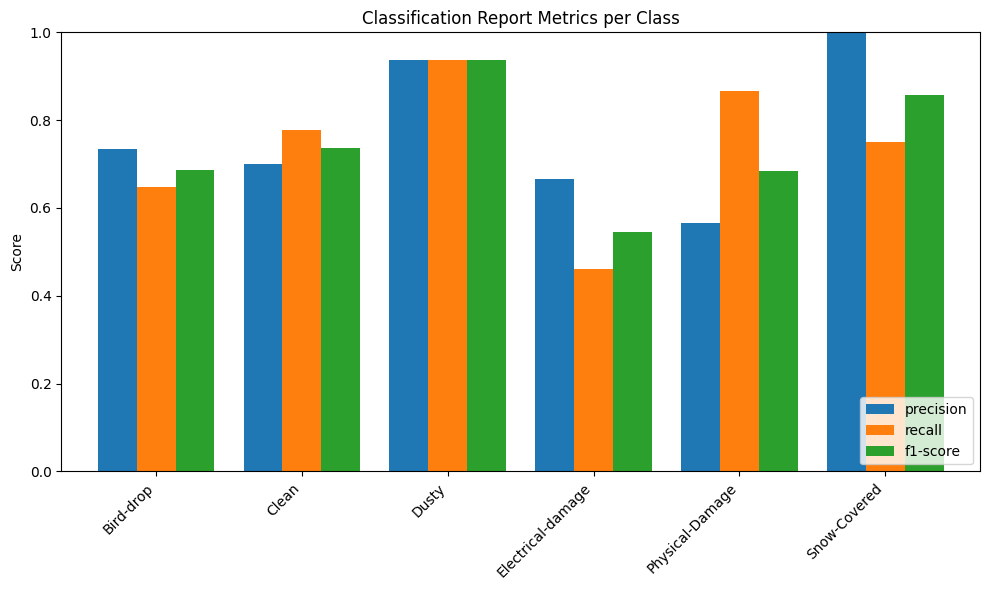

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report as dictionary
report1 = classification_report(y_true1, y_pred1, target_names=class_names, output_dict=True)

# Convert to DataFrame
df1 = pd.DataFrame(report1).transpose()

# Drop summary rows if you only want per-class metrics
df_classes1 = df1.iloc[:-3, :]

# Plot
df_classes1[["precision", "recall", "f1-score"]].plot(
    kind="bar", figsize=(10,6), width=0.8
)

plt.title("Classification Report Metrics per Class")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

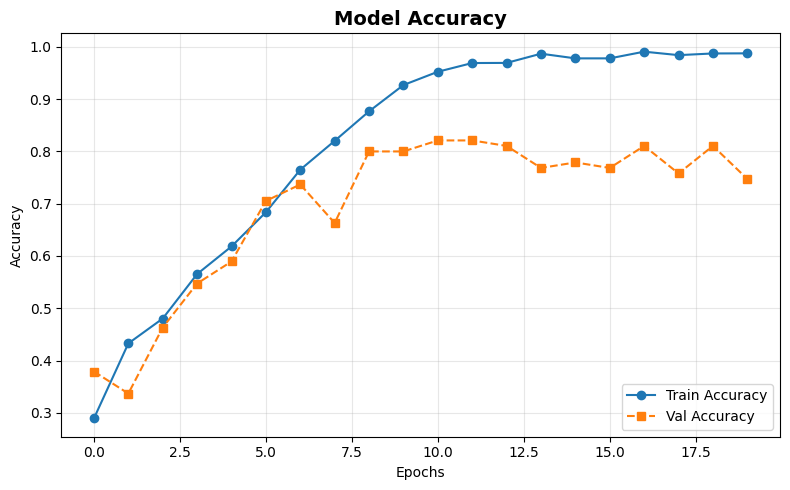

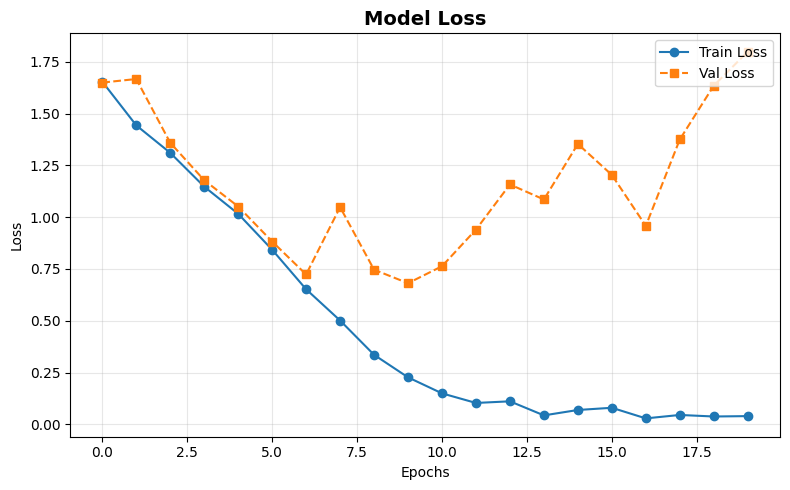

In [32]:
import matplotlib.pyplot as plt

# --- Accuracy Plot ---
plt.figure(figsize=(8,5))
plt.plot(history1.history['accuracy'], label='Train Accuracy', marker='o', linestyle='-')
plt.plot(history1.history['val_accuracy'], label='Val Accuracy', marker='s', linestyle='--')
plt.title("Model Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history1.history['loss'], label='Train Loss', marker='o', linestyle='-')
plt.plot(history1.history['val_loss'], label='Val Loss', marker='s', linestyle='--')
plt.title("Model Loss", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# resnet50

In [15]:
from tensorflow.keras.applications.resnet50 import preprocess_input
train_ds1 = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_ds1 = val_dataset.map(lambda x, y: (preprocess_input(x), y))

In [35]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import layers, models

# ------------------------------
num_classes=len(class_names)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

def preprocess(images, labels):
    return preprocess_input(images), labels  # ResNet50 expects [-1,1] scaling

train_ds2 = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))
train_ds2 = train_dataset.map(preprocess)
val_ds2 = val_dataset.map(preprocess)

# Prefetch for performance
train_ds2 = train_ds2.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds2 = val_ds2.prefetch(buffer_size=tf.data.AUTOTUNE)

# ------------------------------
# 3. Build ResNet50 Model
# ------------------------------
def build_resnet50(input_shape=(224,224,3), num_classes=10, multi_label=False):
    base_model = ResNet50(
        include_top=False,
        weights="imagenet",
        input_shape=input_shape
    )
    base_model.trainable = False  # freeze base

    inputs = tf.keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)

    if multi_label:
        outputs = layers.Dense(num_classes, activation="sigmoid")(x)
        loss = "binary_crossentropy"
    else:
        outputs = layers.Dense(num_classes, activation="softmax")(x)
        loss = "sparse_categorical_crossentropy"

    model = models.Model(inputs, outputs)
    return model, loss


multi_label = False  # change to True if images can have multiple labels
res_model, loss_fn = build_resnet50(
    input_shape=(224,224,3),
    num_classes=num_classes,
    multi_label=multi_label
)

# ------------------------------
# 4. Compile & Train (Frozen Base)
# ------------------------------
res_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=loss_fn,
    metrics=["accuracy"]
)

print("\n Training with frozen ResNet50...")
history = res_model.fit(train_ds2, validation_data=val_ds2, epochs=5)

# ------------------------------
# 5. Fine-tuning (Unfreeze Last Block)
# ------------------------------
print("\n Fine-tuning last ResNet50 block...")

for layer in res_model.layers[-30:]:
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

res_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # smaller LR
    loss=loss_fn,
    metrics=["accuracy"]
)

history_finetune = res_model.fit(train_ds2, validation_data=val_ds2, epochs=10)

# ------------------------------
# 6. Evaluation
# ------------------------------
val_loss, val_acc = model.evaluate(val_ds2)
print(f"\n Final Validation Accuracy: {val_acc:.4f}")


 Training with frozen ResNet50...
Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 61s 347ms/step - accuracy: 0.4671 - loss: 1.7257 - val_accuracy: 0.8127 - val_loss: 0.5328
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 254ms/step - accuracy: 0.7765 - loss: 0.6346 - val_accuracy: 0.8816 - val_loss: 0.3574
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 33s 244ms/step - accuracy: 0.8408 - loss: 0.4579 - val_accuracy: 0.9085 - val_loss: 0.2929
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 258ms/step - accuracy: 0.8567 - loss: 0.4089 - val_accuracy: 0.9010 - val_loss: 0.3091
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 35s 253ms/step - accuracy: 0.8675 - loss: 0.3635 - val_accuracy: 0.9107 - val_loss: 0.2681

 Fine-tuning last ResNet50 block...
Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 146s 606ms/step - accuracy: 0.6423 - loss: 1.1547 - val_accuracy: 0.9214 - val_loss: 0.2575
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 90s 447ms/step - accuracy: 0.8595 - loss: 0.4045 - val_accuracy: 0.9656 - val_loss: 0.1610
Epoch 3/10
137/

In [ ]:
val_loss, val_acc = res_model.evaluate(val_ds2)
print(f"\n✅ Final Validation Accuracy: {val_acc:.4f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 48s 2s/step - accuracy: 0.9828 - loss: 0.1220

✅ Final Validation Accuracy: 0.9828


Found 95 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']


2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step


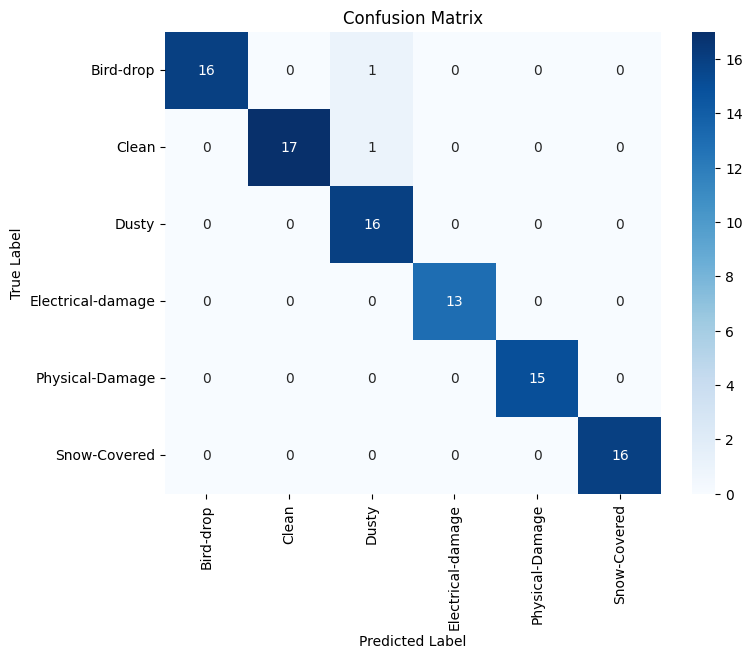

                   precision    recall  f1-score   support

        Bird-drop       1.00      0.94      0.97        17
            Clean       1.00      0.94      0.97        18
            Dusty       0.89      1.00      0.94        16
Electrical-damage       1.00      1.00      1.00        13
  Physical-Damage       1.00      1.00      1.00        15
     Snow-Covered       1.00      1.00      1.00        16

         accuracy                           0.98        95
        macro avg       0.98      0.98      0.98        95
     weighted avg       0.98      0.98      0.98        95



In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


# Load validation or test dataset (make sure labels are available)
val2 = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/dataset/test",  # update with your folder
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # important! keep order
)

class_names = val2.class_names


val2 = val2.map(lambda x, y: (preprocess_input(x), y))

# Get class names
print("Classes:", class_names)

# Make predictions
y_true2 = np.concatenate([y for x, y in val2], axis=0)
y_pred_probs2 = res_model.predict(val2)
y_pred2 = np.argmax(y_pred_probs2, axis=1)

# Confusion matrix
cm2 = confusion_matrix(y_true2, y_pred2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print(classification_report(y_true2, y_pred2, target_names=class_names))

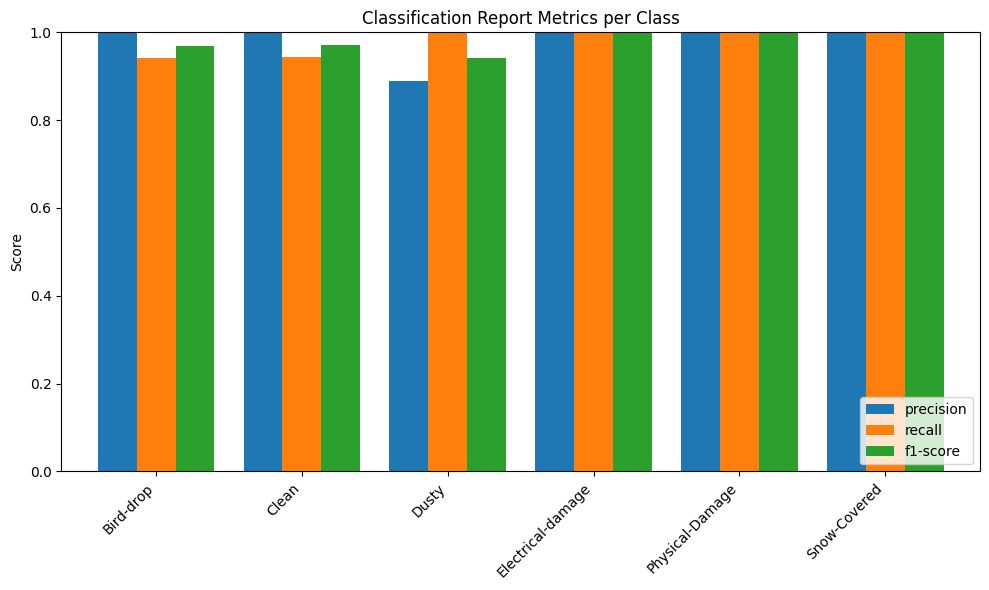

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Get classification report as dictionary
report2 = classification_report(y_true2, y_pred2, target_names=class_names, output_dict=True)

# Convert to DataFrame
df2 = pd.DataFrame(report2).transpose()

# Drop summary rows if you only want per-class metrics
df_classes2 = df2.iloc[:-3, :]

# Plot
df_classes2[["precision", "recall", "f1-score"]].plot(
    kind="bar", figsize=(10,6), width=0.8
)

plt.title("Classification Report Metrics per Class")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45, ha="right")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

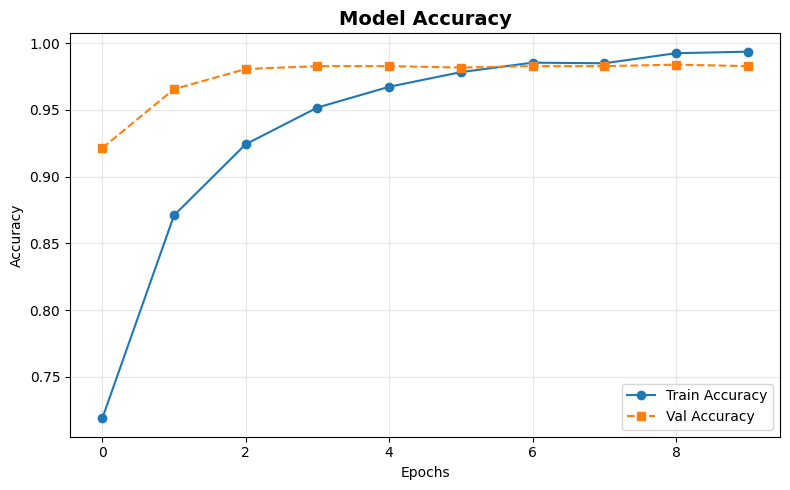

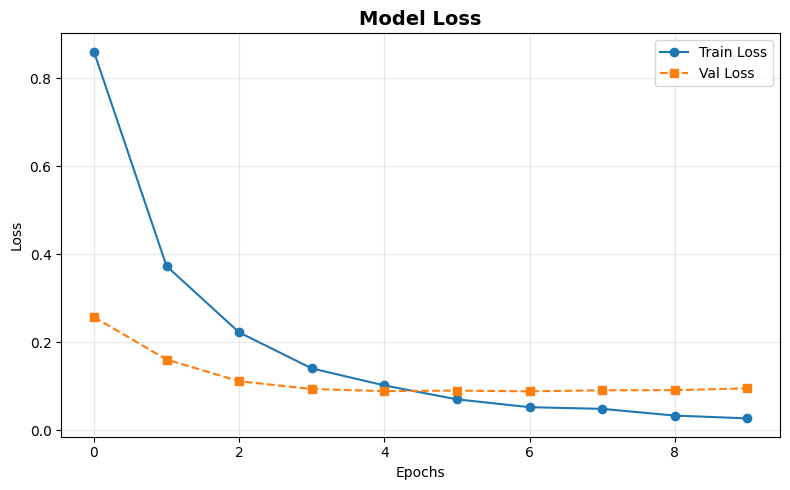

In [38]:
import matplotlib.pyplot as plt

# --- Accuracy Plot ---
plt.figure(figsize=(8,5))
plt.plot(history_finetune.history['accuracy'], label='Train Accuracy', marker='o', linestyle='-')
plt.plot(history_finetune.history['val_accuracy'], label='Val Accuracy', marker='s', linestyle='--')
plt.title("Model Accuracy", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Loss Plot ---
plt.figure(figsize=(8,5))
plt.plot(history_finetune.history['loss'], label='Train Loss', marker='o', linestyle='-')
plt.plot(history_finetune.history['val_loss'], label='Val Loss', marker='s', linestyle='--')
plt.title("Model Loss", fontsize=14, fontweight='bold')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image

import numpy as np

img_path=r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\.jpg"


def predict_single_image(model, img_path, class_names, target_size=(224,224)):
    # Load image
    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)        # Convert to numpy array
    x = np.expand_dims(x, axis=0)      # Add batch dimension
    x = preprocess_input(x)            # ResNet50 preprocessing ([-1,1] scaling)

    # Predict
    preds = model.predict(x)
    y_pred = np.argmax(preds,axis=1)

    pred_class = class_names[y_pred[0]]  # Get class label
    confidence = np.max(preds)
    return pred_class, confidence

In [ ]:
predict_single_image(res_model, img_path, class_names, target_size=(224,224))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


('Electrical-damage', np.float32(0.99990547))

In [ ]:
img_path1=r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\Bird (11).jpg"
img_path2=r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\Dust (20).jpg"
img_path3=r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\Electrical (22).jpg"
img_path4=r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\Physical (30).jpg"
img_path5=r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\Solar (88).jpg"
img_path6=r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\Solar (110).jpg"


In [ ]:
predict_single_image(res_model, img_path1, class_names, target_size=(224,224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


('Bird-drop', np.float32(0.46920785))

In [ ]:
predict_single_image(res_model, img_path2, class_names, target_size=(224,224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


('Dusty', np.float32(0.608532))

In [ ]:
predict_single_image(res_model, img_path3, class_names, target_size=(224,224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


('Electrical-damage', np.float32(0.9999964))

In [ ]:
predict_single_image(res_model, img_path4, class_names, target_size=(224,224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


('Physical-Damage', np.float32(0.9724504))

In [ ]:
predict_single_image(res_model, img_path5, class_names, target_size=(224,224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


('Snow-Covered', np.float32(0.9983317))

In [ ]:
predict_single_image(res_model, img_path6, class_names, target_size=(224,224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


('Snow-Covered', np.float32(0.799601))

In [ ]:
res_model.save("resnet.keras")

In [ ]:
from PIL import Image

# Open the WebP image
img = Image.open(r"C:\Users\HP\Desktop\mini project1\solar panel\test_images\product-jpeg-500x500.webp").convert("RGB")  # Convert to RGB for JPEG

# Save as JPG
img.save("output1.jpg", "JPEG")

In [ ]:
img_path7=r"C:\Users\HP\Desktop\mini project1\solar panel\output1.jpg"

# Mobilenet

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# -----------------------------
# Build MobileNetV2 model
# -----------------------------
num_classes = 10  # set number of classes in your dataset

base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze backbone

inputs = layers.Input(shape=(224,224,3))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation="softmax")(x)

mobilenet_model = models.Model(inputs, outputs)

mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

mobilenet_model.summary()

# -----------------------------
# Train
# -----------------------------
history1 = mobilenet_model.fit(train_ds1, validation_data=val_ds1, epochs=10)

# -----------------------------
# Fine-tuning (optional)
# -----------------------------
print("\n🔹 Fine-tuning last MobileNetV2 block...")

for layer in mobilenet_model.layers[-30:]:   # unfreeze last ~30 layers
    if not isinstance(layer, layers.BatchNormalization):
        layer.trainable = True

mobilenet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # smaller LR
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

history_finetune1 = mobilenet_model.fit(train_ds1, validation_data=val_ds1, epochs=10)

# ------------------------------
# Evaluation
# ------------------------------
val_loss, val_acc = mobilenet_model.evaluate(val_ds1)
print(f"\n✅ Final Validation Accuracy: {val_acc:.4f}")

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 99s 656ms/step - accuracy: 0.4497 - loss: 1.4967 - val_accuracy: 0.6351 - val_loss: 1.0172
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 135s 607ms/step - accuracy: 0.6199 - loss: 1.0303 - val_accuracy: 0.6975 - val_loss: 0.8650
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 89s 642ms/step - accuracy: 0.6663 - loss: 0.9108 - val_accuracy: 0.7234 - val_loss: 0.7797
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 90s 650ms/step - accuracy: 0.6942 - loss: 0.8362 - val_accuracy: 0.7503 - val_loss: 0.7154
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 89s 644ms/step - accuracy: 0.7180 - loss: 0.7671 - val_accuracy: 0.7718 - val_loss: 0.6651
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 143s 648ms/step - accuracy: 0.7244 - loss: 0.7392 - val_accuracy: 0.7643 - val_loss: 0.6846
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 142s 646ms/step - accuracy: 0.7475 - loss: 0.7017 - val_accuracy: 0.7890 - val_loss: 0.6228
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 86s 625ms/step - accuracy: 0.7582 - loss

NameError: name 'val_ds' is not defined

In [20]:
val_loss, val_acc = mobilenet_model.evaluate(val_ds1)
print(f"\n✅ Final Validation Accuracy: {val_acc:.4f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 15s 478ms/step - accuracy: 0.9171 - loss: 0.2756

✅ Final Validation Accuracy: 0.9171


Found 95 files belonging to 6 classes.
Classes: ['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 482ms/step


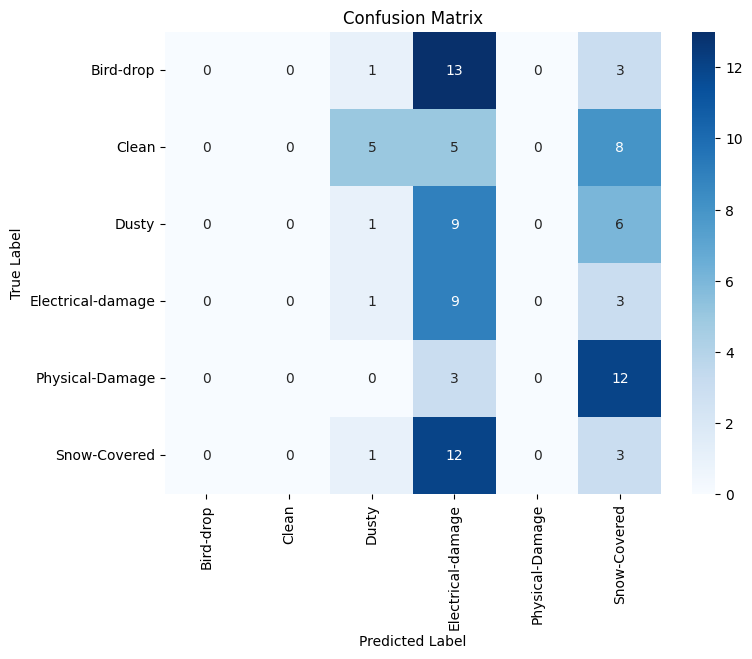

                   precision    recall  f1-score   support

        Bird-drop       0.00      0.00      0.00        17
            Clean       0.00      0.00      0.00        18
            Dusty       0.11      0.06      0.08        16
Electrical-damage       0.18      0.69      0.28        13
  Physical-Damage       0.00      0.00      0.00        15
     Snow-Covered       0.09      0.19      0.12        16

         accuracy                           0.14        95
        macro avg       0.06      0.16      0.08        95
     weighted avg       0.06      0.14      0.07        95



C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\HP\anaconda3\envs\tensorflow\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


# Load validation or test dataset (make sure labels are available)
val3 = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\HP\Desktop\mini project1\solar panel\dataset2\dataset\test",  # update with your folder
    image_size=(224, 224),
    batch_size=32,
    shuffle=False   # important! keep order
)

class_names = val3.class_names


val3 = val3.map(lambda x, y: (preprocess_input(x), y))

# Get class names
print("Classes:", class_names)

# Make predictions
y_true3 = np.concatenate([y for x, y in val3], axis=0)
y_pred_probs3 = mobilenet_model.predict(val3)
y_pred3 = np.argmax(y_pred_probs3, axis=1)

# Confusion matrix
cm3 = confusion_matrix(y_true3, y_pred3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Optional: classification report
print(classification_report(y_true3, y_pred3, target_names=class_names))

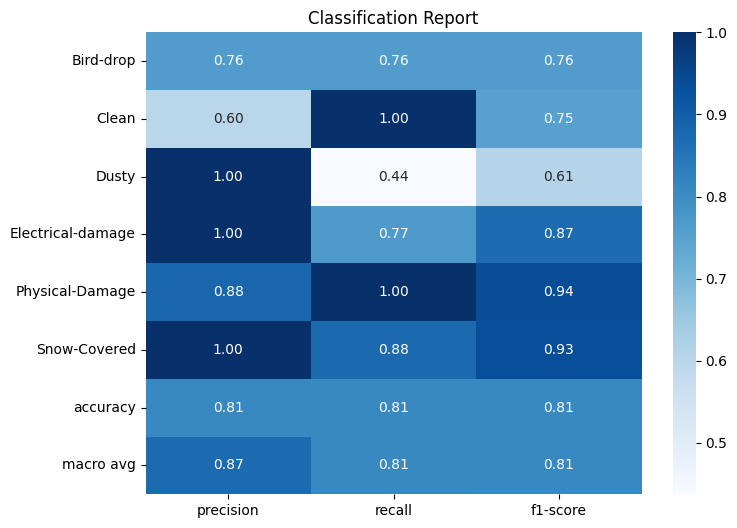

In [ ]:
import pandas as pd
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(8,6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", fmt=".2f")
plt.title("Classification Report")
plt.show()

In [ ]:
from tensorflow import keras

# Load model from /content
model = keras.models.load_model("resnet.keras")

# Check summary
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │        12,294 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,693,780 (269.68 MB)

 Trainable params: 23,546,886 (89.82 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 47,093,774 (179.65 MB)

In [ ]:
predict_single_image(model, img_path6, class_names, target_size=(224,224))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


('Snow-Covered', np.float32(0.98846996))

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLO11 model. The “n”, “s”, “m”, “l” etc. denote the size.
model_yolo = YOLO("my_model.pt")

In [ ]:
import cv2

# Read image
img = cv2.imread(img_path6)

# Convert to LAB color space
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
cl = clahe.apply(l)

# Merge channels back
limg = cv2.merge((cl,a,b))

# Convert back to BGR
contrast_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

In [ ]:
import cv2

# Load image
img = cv2.imread(img_path6)

# --- Increase contrast (alpha > 1) and brightness (beta) ---
alpha = 1.5  # contrast (1.0 = original, >1 = more contrast)
beta = 0     # brightness
contrast_img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# --- Resize image ---
resized_img1 = cv2.resize(contrast_img, (640, 640))  # YOLO default size is 640x640

In [ ]:
results = model_yolo.predict(contrast_img, conf=0.25)
# show or save
results[0].show()


0: 352x640 (no detections), 91.8ms
Speed: 2.7ms preprocess, 91.8ms inference, 0.6ms postprocess per image at shape (1, 3, 352, 640)


In [ ]:
image8=r"C:\Users\HP\Desktop\mini project1\solar panel\test_images\download.jpg"
image9=r"C:\Users\HP\Desktop\mini project1\solar panel\test_images\images.jpg"
image10=r"C:\Users\HP\Desktop\mini project1\solar panel\test_images\download (1).jpg"

In [ ]:
import cv2

# Load image
img = cv2.imread(image10)

# Resize to 640x640
resized = cv2.resize(img, (640, 640))

In [ ]:
results = model_yolo.predict(resized, conf=0.25)
# show or save
results[0].show()


0: 640x640 1 Snow-covered, 125.1ms
Speed: 6.4ms preprocess, 125.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
class_names=['Bird-drop', 'Clean', 'Dusty', 'Electrical-damage', 'Physical-Damage', 'Snow-Covered']

In [ ]:
class_names[1]

'Clean'